# Associate Rule Mining (ARM) on Workforce Diveristy Outcomes Record Dataset

## 1. Introduction

Associate rule mining (ARM) is concerned with associations between data items. ARM is an unsupervised machine learning method and is best used with categorical variables, so I am most concerned with the categorical record feature variables in my dataset. I want to find associations between seniority, gender, and ethnicity. There are seven levels of seniority, with 1 being the lowest and 7 being the highest (Revelio Labs, 2022). The dataset only has 2 levels of gender: male and female. Finally, there are six categories of ethnicity: 'api', 'black', 'hispanic', 'multiple', 'native', 'white.' I am not using the discrete variable 'count' or continuous variables 'inflow,' 'outflow,' and 'salary,' since ARM works best with categorical variables. Through my ARM analysis, I hope to uncover relationships between gender, ethnicity, and seniority in the six different public companies. 

## 2. Theory

ARM is used to find associations between items in a set of transactions, or dataset. In particular, it is used for categorical data. ARM can be summarized in if-then statements; the "if" is also called an antecedent, while the "then" is also called a consequent. For example, we can find the association that "if a customer buys succulents, then they will purchase fertilizer", which can be represented as {"succulents" --> "fertilizer"}; here, "succulents" is the "if" or antecedent, while "fertilizer" is the "then" or consequent. This association is directional, so one direction of the association may not hold true for the other direction (Remanan, 2018). In other words, the association "if X then Y" does not mean "if Y then X". 

Market basket analysis is a key application of ARM to uncover associations between items purchased by a customer. For example, if people purchase a sponge, they might purchase dish detergent as well since these are complementary cleaning household items. Learning about the strength of associations like this is helpful for companies to place products on aisles. It is important to note that ARM finds associations in a whole group rather than for a single identifier or customer, so we will not use this algorithm to, say, develop personal recommendations for a user given the user's past purchasing baskets (Garg, 2018).

Defining several terms in ARM can help us understand ARM further. An itemset is a set of items described in a rule that can be partitioned into a binary "if" and "then". A rule describes a directional association between items in an itemset. For example, {X, Y, Z} is an itemset while {X -> Y, Z} and {Y -> X, Z} are two example rules that could emerge from this itemset. 

Furthermore, there are several concepts of ARM that are used to evaluate the strength of a rule:
1. Support is the fraction of data containing the itemset. Given itemset {X, Y}, Support(X and Y) = P(X and Y). 
2. Confidence is the probability of occurrence of {Y} given {X} is present, or {Y|X}. Confidence(X -> Y) = P(X and Y) / P(X). 
3. Lift is the ratio of confidence to baseline probability of occurrence of {Y}. Lift(X -> Y) = Support(X and Y) / (Support(X) * Support(Y)). 

The apriori algorithm is one of many algorithms used for ARM. The apriori algorithm has two main steps: 
1. Finds frequent itemsets with only 1 item. Frequent itemsets are defined as itemsets where support is greater than or equal to a minimum threshold, minsup. Apriori iterates this process to find frequent itemsets with only 2 items, then 3 items, and so on. Identifying frequent itemsets reduces the number of iterations apriori would have to perform in the next step. 
2. Generates all permutations of "if" and "then" rules from the frequent itemsets. Apriori then prunes to find rules that have a confidence level above the minimum confidence level (minconf).

## 3. Methods

To conduct ARM, I first load necessary libraries and read the cleaned data. Then, I conducted further data cleaning by selecting the three relevant columns of gender, ethnicity, and seniority, convert them to string datatype, and then reformat them into a list of lists called 'temp' for the apriori algorithm. Each list in 'temp' contains 3 items––a given employee's gender, ethnicity, and seniority. 

Then, I defined three apriori utility functions referenced from Lab 6.1 led by Professor Nakul and Professor Hickman. The function reformat_results converts the apriori algorithm's output into pandas dataframe with columns "rhs", "lhs", "supp", "conf", "supp x conf", and "lift". Specifically, The apropri model divides the data into LHS and RHS, which are the antecedent ("if") and consequent ("then"). Then, the function convert_to_network() converts the dataframe to a network graph. Finally, the function plot_network() plots and visualizes the ARM network. 

After defining these utility functions with global variables, I trained the ARM model on my data. I defined the parameters min_support, min_confidence, min_length, and max_length. In short, min_support is the minimum support or minsup variable mentioned in the previous subsection; the algorithm selects support values greater than the value specified in the parameter. Similarly, min_confidence is the minimum confidence or minconf variable and selects confidence values greater than specified. Min_length specifies the minimum number of items in each itemset while max_length specifies the maximum number of items in each itemset. I tried various min_support and min_confidence values and finalized on values that gave me data that made the most sense, while I specified min_length to be 2 and max_length to be 3, since there are only 3 different categories of variables from which associations can emerge. After defining the parameters, I applied the apriori() function to my 'temp' list of lists, and then applied the utility functions to the algorithm's output to generate an ARM network graph.

In [88]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import networkx as nx 

# Read data
df = pd.read_csv('../data/cleaned_wf_demo.csv', index_col=0)
df['ethnicity'].unique()

array(['api', 'black', 'hispanic', 'multiple', 'native', 'white'],
      dtype=object)

In [89]:
## Clean and reformat data

# Convert seniority column to string type since convert_to_network takes in string type
df['seniority'] = df.seniority.astype(str)

# Select the columns we need into temporarly dataframes
temp_1 = df['seniority']
temp_2 = df['gender']
temp_3 = df['ethnicity']

# Reset index for both dataframes
temp_1.reset_index(drop=True, inplace=True)
temp_2.reset_index(drop=True, inplace=True)
temp_3.reset_index(drop=True, inplace=True)

# Initialize list
temp = [] 

# Create a list of lists of the data we need
for i in range(0, len(temp_1)):
    x = [temp_1[i], temp_2[i], temp_3[i]]
    temp.append(x)

# Check temp list
temp[7050:7070]

[['2', 'female', 'api'],
 ['5', 'female', 'api'],
 ['2', 'male', 'api'],
 ['4', 'male', 'api'],
 ['5', 'female', 'api'],
 ['6', 'male', 'api'],
 ['2', 'female', 'black'],
 ['4', 'female', 'black'],
 ['2', 'male', 'black'],
 ['5', 'male', 'black'],
 ['5', 'female', 'black'],
 ['6', 'female', 'black'],
 ['6', 'female', 'black'],
 ['2', 'male', 'black'],
 ['6', 'male', 'black'],
 ['2', 'male', 'black'],
 ['5', 'female', 'black'],
 ['6', 'female', 'black'],
 ['6', 'female', 'black'],
 ['1', 'male', 'black']]

In [90]:
## Define apriori utility functions

# Define function that converts apriori output into pandas dataframe with columns "rhs","lhs","supp","conf","supp x conf", and "lift"
def reformat_results(results):
    keep = []

    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            if (j > 1):
                for k in range(0,len(list(results)[i][j])):
                    if(len(results[i][j][k][0])!=0):
                        rhs = list(results[i][j][k][0])
                        lhs = list(results[i][j][k][1])
                        conf = float(results[i][j][k][2])
                        lift = float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
            if (j == 1):
                supp = results[i][j]
    return pd.DataFrame(keep,columns = ["rhs","lhs","supp","conf","supp x conf","lift"])

# Define convert_to_network function that converts dataframe to network
def convert_to_network(dfa):
    print(dfa)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in dfa.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    return G

# Define plot_network function that plots network
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Reds')
    colors_e 	= [cmap(G[u][v]['weight']*20) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    node_color="pink",
    node_size=2000,
    linewidths=1.5,
    font_size=10,
    font_color="black",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Gender and Seniority')
    plt.show()

           rhs       lhs      supp  conf  supp x conf  lift
0          [1]  [female]  0.081633   0.5     0.040816   1.0
1          [1]    [male]  0.081633   0.5     0.040816   1.0
2          [2]  [female]  0.081633   0.5     0.040816   1.0
3          [2]    [male]  0.081633   0.5     0.040816   1.0
4          [3]  [female]  0.081633   0.5     0.040816   1.0
5          [3]    [male]  0.081633   0.5     0.040816   1.0
6          [4]  [female]  0.079932   0.5     0.039966   1.0
7          [4]    [male]  0.079932   0.5     0.039966   1.0
8          [5]  [female]  0.081633   0.5     0.040816   1.0
9          [5]    [male]  0.081633   0.5     0.040816   1.0
10         [6]  [female]  0.078231   0.5     0.039116   1.0
11         [6]    [male]  0.078231   0.5     0.039116   1.0
12       [api]  [female]  0.083333   0.5     0.041667   1.0
13       [api]    [male]  0.083333   0.5     0.041667   1.0
14     [black]  [female]  0.083333   0.5     0.041667   1.0
15     [black]    [male]  0.083333   0.5

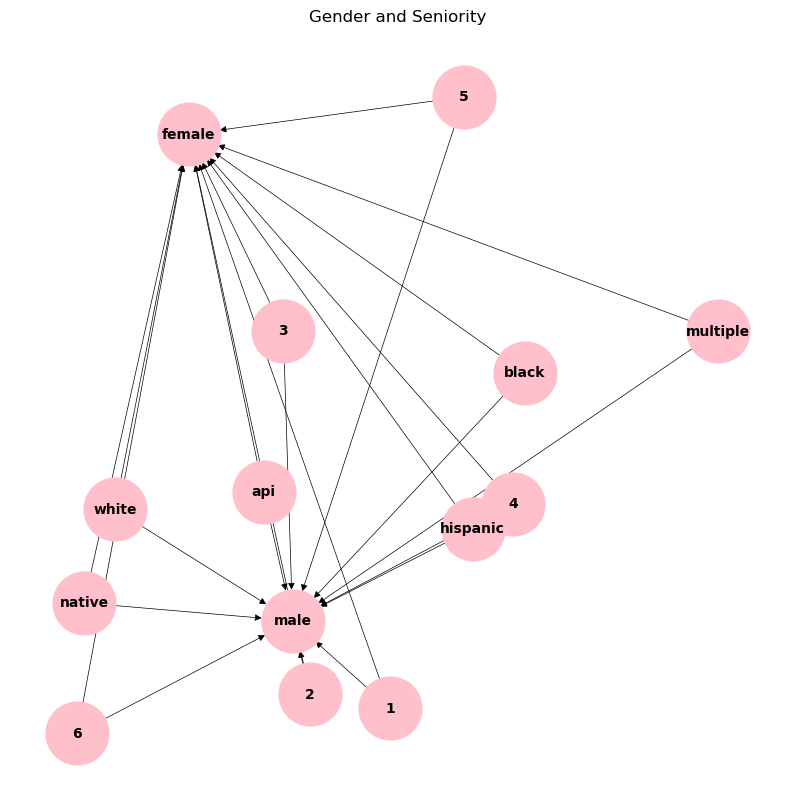

In [91]:
## Train model

# Define paramters
minsup = 0.035
minconfi = 0.25
minlen = 2
maxlen = 3

# Generate results
results = list(apriori(temp, min_support = minsup, min_confidence = minconfi, min_length = minlen, max_length = maxlen))

# Apply functions to results
pd_results = reformat_results(results)
G = convert_to_network(pd_results)
plot_network(G)

## 4. Results

The results can be summarized in the following points:
1. Employees with either gender identity have strong associations with all ethnicity and job seniority categories. This means that there are no particular associations that are highlighted or revealing. This is confirmed with the generally consistent confidence and lift values. 
2. Single-sided arrows in the network indicate that all associations are one-directional. That means that for any given association rule in the network, the other direction does not apply. For example, if we look at the association between male and 5, because the arrow is pointing from 5 to male, that means if someone is male then they have a job seniority of 5, but it does not that if someone has a job seniority of 5 then they are male. In particular, the arrows point towards gender, indicating "if" there's a given ethnicity or job category, "then" there is an associated gender. 
3. There are no associations between the gender categories, between the ethnicity categories, or between the seniority categories––this makes sense because each person can only take one value of each of these three groups. 

## 5. Conclusion

In conclusion, it seems like ARM is not indicating any particular relationships between gender, ethnicity, and job seniority. This finding indicates that there may be other variables that I did not include in my features that affect seniority. If I had more time to conduct this analysis, I would examine other variables further to see if there are any associations. In particular, I would love to include company label, as past analyses in supervised ML algorithms showed me that there is a company-by-company variation in variables like seniority, ethnicity, and gender. Also, since I generated findings from incorporating variables like salary, inflow, and outflow, which cannot be included here since these are not categorical variables, ARM may not the most suitable algorithm for this dataset. 

## 6. References

1. Edureka!. "Apriori Algorithm Explained | Association Rule Mining | Finding Frequent Itemset | Edureka." YouTube, YouTube, 19 June 2019, https://www.youtube.com/watch?v=guVvtZ7ZClw. 
2. Remanan, S. (2018, November 2). Association rule mining. Medium. Retrieved December 1, 2022, from https://towardsdatascience.com/association-rule-mining-be4122fc1793 
3. Revelio Labs (2022, June 2). "FAQs" Revelio Labs Data Dictionary. Retrieved December 1, 2022, from https://www.data-dictionary.reveliolabs.com/faq.html
4. Garg, Anisha (2018, September 3). "Complete guide to Association Rules (1/2)." Medium. Retrieved December 1, 2022, from https://towardsdatascience.com/association-rules-2-aa9a77241654
5. Garg, Anisha (2018, September 17). "Complete guide to Association Rules (2/2)." Medium. Retrieved December 1, 2022, from https://towardsdatascience.com/complete-guide-to-association-rules-2-2-c92072b56c84